In [1]:
import scipy.optimize as optimize
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from numpy import random

# The Data

In [2]:
# Raw Dataframe
df = pd.DataFrame(
    {'Time' : [22, 22, 22, 22, 22, 22, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
     'ul' : [3, 2, 3, 2, 1, 1, 5, 5, 4, 4, 4, 4, 4, 5, 3, 5, 7, 6, 6, 6, 6, 7, 7, 5, 5, 6, 8, 8, 9, 10, 9, 11, 10, 9, 8, 9]}
)
df

,Time,ul
0,22,3
1,22,2
2,22,3
3,22,2
4,22,1
5,22,1
6,44,5
7,44,5
8,44,4
9,44,4


## Mean of data points grouped by Time amounts

Please not that some of the data points have more values than others to determien the mean amount of water that is dispensed

In [3]:
# Getting mean values for datapoints
df_calc = df.groupby('Time').mean().reset_index()
df_calc = df_calc.sort_values('ul', ascending=True)
df_calc

,Time,ul
0,22,2.0
1,44,4.3
2,52,6.1
3,60,9.1


# Equations

## ul vs Time

In [4]:
#Set x as ul and y as Time
x, y = df_calc['ul'], df_calc['Time']

#This equation is used to determine the relationship of how ul is related to time (x = ul, y = time)

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.55051 * x + -0.74653 * x^2 + -1.73702


In [5]:
## Using this equation, we can determine how many ms it would take for 8 ul of water to come out of the solenoid

def waterfunction(x):
    y = 13.55051 * x + -0.74653 * x ** 2 + -1.73702
    return(y)

waterfunction(8)

58.88913999999999

In [6]:
# In the mean dataframe (df_calc), we can replace the last row with 9 ul with 8 ul which is determined by the equation above

df_calc.loc[3, 'Time'] = waterfunction(8)
df_calc.loc[3, 'ul'] = 8
df_calc

,Time,ul
0,22.00000,2.0
1,44.00000,4.3
2,52.00000,6.1
3,58.88914,8.0


In [7]:
# Using the edited dataframe with 8 ul, we can get a new equation

x, y = df_calc['ul'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 13.94674 * x + -0.79141 * x^2 + -2.43169


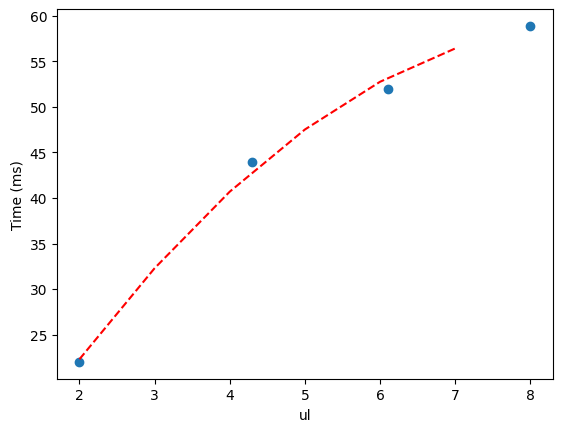

In [8]:
#Graphing the Equation Above
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [9]:
# Now lets make the equation to convert time to ul amount

x, y = df_calc['Time'], df_calc['ul']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = -0.15112 * x + 0.00388 * x^2 + 3.44460


In [10]:
def Test(x):
    y = -0.15112 * x + 0.00388 * x**2 + 3.44460
    return(y)


In [11]:
Test(3848.68)

56893.702518911996

## DataFrame Manipulation to find open time equations

In [12]:
# Mirroring ul values in a new column
df_calc['ul Opposite'] = [8, 6.1, 4.3, 2]

In [13]:
# Finding the equation for ul opposite(x) vs Time

x1, y1 = df_calc['ul Opposite'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x1, y1)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 4.57457 * x + -1.05457 * x^2 + 53.50447


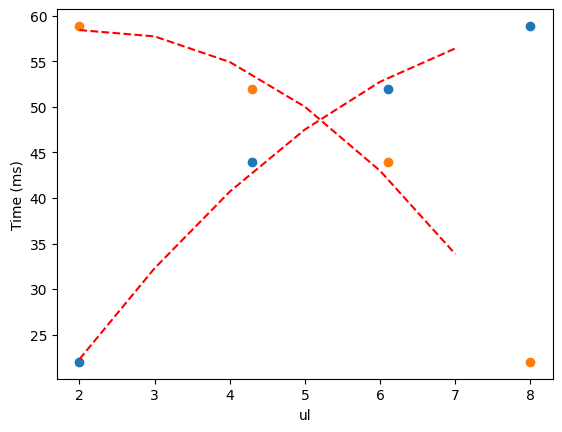

In [14]:
# Graphing ul(x) vs ul (y)

x1_line = arange(min(x1), max(x1), 1)
y1_line = objective(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.plot(x1_line, y1_line, '--', color='red')
plt.scatter(x = 'ul', y = 'Time', data = df_calc)
plt.scatter(x = 'ul Opposite', y = 'Time', data = df_calc)
plt.ylabel("Time (ms)")
plt.xlabel("ul")
plt.show()

In [15]:
# At what point do these two lines cross?

from sympy import symbols, Eq, solve

# Define the symbols and equations
x, y = symbols('x y')
eq1 = Eq(y, 0.26026 * x + -0.00522 * x**2 + 4.79342)
eq2 = Eq(y, -0.15112 * x + 0.00388 * x**2 + 3.44460)

# Solve the system of equations
sol = solve((eq1, eq2), (x, y))

# Print the solution
print(sol)


[(-3.07024999129229, 3.94515074651913), (48.2768433978857, 5.19193942655176)]


The crossover point between these two equations shown above is at (5.2 ul, 48.28 ms)

In [16]:
# Confirmation test

waterfunction(5.2)

48.539460799999986

In [17]:
new_row = {'Time': 48.2768433978857, 'ul': 5.19193942655176, 'ul Opposite': None}

df_calc = pd.concat([df_calc.loc[:1], pd.DataFrame([new_row]), df_calc.loc[2:]], ignore_index=True)

In [18]:
df_calc

,Time,ul,ul Opposite
0,22.000000,2.000000,8.0
1,44.000000,4.300000,6.1
2,48.276843,5.191939,NaN
3,52.000000,6.100000,4.3
4,58.889140,8.000000,2.0


## Using Ratios

In [19]:
# Add first set of ratios
df_calc['(F-R)/(F+R)'] = [-1, None, 0, None, 1]

#Drop the rows with None in the (F-R)/(F+R) column
df_calc = df_calc.dropna(subset=['(F-R)/(F+R)'])

df_calc

,Time,ul,ul Opposite,(F-R)/(F+R)
0,22.000000,2.000000,8.0,-1.0
2,48.276843,5.191939,NaN,0.0
4,58.889140,8.000000,2.0,1.0


In [20]:
# Determine the equation comparing the ratios to time values
x = df_calc['(F-R)/(F+R)']
y = df_calc['Time']

p = np.polyfit(x, y, 2)

print(f'The equation is Time = {p[0]:.2f} * (F-R)/(F+R)**2 + {p[1]:.2f} * (F-R)/(F+R) + {p[2]:.2f}')

The equation is Time = -7.83 * (F-R)/(F+R)**2 + 18.44 * (F-R)/(F+R) + 48.28


In [21]:
# Make another column in the dataframe reversing the ratio column

df_calc['reversed_ratios'] = [1.0, 0.0, -1.0]
df_calc

/var/folders/_9/bcsw8t693hgcmq4vq9xkqkb40000gn/T/ipykernel_11790/43994359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calc['reversed_ratios'] = [1.0, 0.0, -1.0]


,Time,ul,ul Opposite,(F-R)/(F+R),reversed_ratios
0,22.000000,2.000000,8.0,-1.0,1.0
2,48.276843,5.191939,NaN,0.0,0.0
4,58.889140,8.000000,2.0,1.0,-1.0


In [22]:
## Make the second equation that will crossover the first 

x = df_calc['reversed_ratios']
y = df_calc['Time']

p = np.polyfit(x, y, 2)

print(f'The equation is Time = {p[0]:.2f} * (F-R)/(F+R)**2 + {p[1]:.2f} * (F-R)/(F+R) + {p[2]:.2f}')

The equation is Time = -7.83 * (F-R)/(F+R)**2 + -18.44 * (F-R)/(F+R) + 48.28


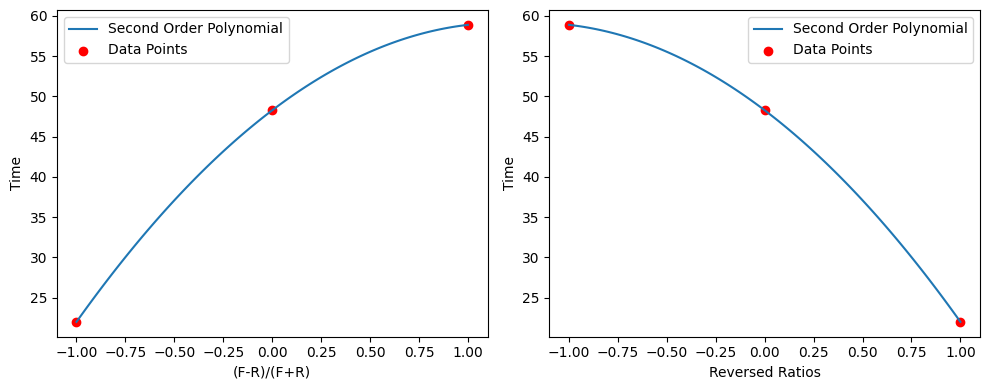

In [23]:
# Graph both equations side by side
x = df_calc['(F-R)/(F+R)']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Create a subplot with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph in the first column
axs[0].plot(x_range, y_range, label='Second Order Polynomial')
axs[0].scatter(x, y, color='red', label='Data Points')
axs[0].set_xlabel('(F-R)/(F+R)')
axs[0].set_ylabel('Time')
axs[0].legend()

# Create the second plot
x = df_calc['reversed_ratios']
y = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p = np.polyfit(x, y, 2)

# Define a range of values for (F-R)/(F+R)
x_range = np.linspace(x.min(), x.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y_range = p[0]*x_range**2 + p[1]*x_range + p[2]

# Plot the curve and the data points in the second column
axs[1].plot(x_range, y_range, label='Second Order Polynomial')
axs[1].scatter(x, y, color='red', label='Data Points')
axs[1].set_xlabel('Reversed Ratios')
axs[1].set_ylabel('Time')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


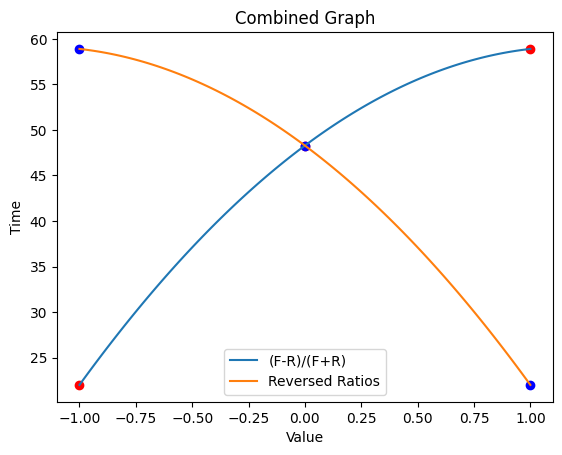

In [24]:
# Graph both equations on the same set of axes
x1 = df_calc['(F-R)/(F+R)']
y1 = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p1 = np.polyfit(x1, y1, 2)

# Define a range of values for (F-R)/(F+R)
x1_range = np.linspace(x1.min(), x1.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y1_range = p1[0]*x1_range**2 + p1[1]*x1_range + p1[2]

# Create the first plot
plt.plot(x1_range, y1_range, label='(F-R)/(F+R)')
plt.scatter(x1, y1, color='red')

# Create the second plot
x2 = df_calc['reversed_ratios']
y2 = df_calc['Time']

# Fit the curve to the data using numpy.polyfit
p2 = np.polyfit(x2, y2, 2)

# Define a range of values for reversed_ratios
x2_range = np.linspace(x2.min(), x2.max(), 100)

# Evaluate the second order polynomial equation for each value in the range
y2_range = p2[0]*x2_range**2 + p2[1]*x2_range + p2[2]

# Plot the second set of data on the same set of axes
plt.plot(x2_range, y2_range, label='Reversed Ratios')
plt.scatter(x2, y2, color='blue')

# Add a title to the plot
plt.title('Combined Graph')

# Add x and y axis labels
plt.xlabel('Value')
plt.ylabel('Time')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


# Summary of Equation

### To convert the ul amount to time:
y = 13.94674 * x + -0.79141 * x^2 + -2.43169\
y = solenoid open time, x = ul

### To convert time to ul amount:
y = -0.15112 * x + 0.00388 * x^2 + 3.44460\
y = ul amount, x = solenoid open time

### Equation #1 (Pull Equation)
Solenoid Open Time = -7.83 * (F-R)/(F+R)**2 + 18.44 * (F-R)/(F+R) + 48.28

### Equation #2 (Push Equation)
The equation is Time = -7.83 * (F-R)/(F+R)**2 + -18.44 * (F-R)/(F+R) + 48.28